In [1]:
import pandas as pd
import statsmodels.api as sm

# 1.) Import Data from FRED

In [2]:
data = pd.read_csv("TaylorRuleData.csv", index_col = 0)
data

,FedFunds,Unemployment,HousingStarts,Inflation
1947-01-01,NaN,NaN,NaN,21.480
1947-02-01,NaN,NaN,NaN,21.620
1947-03-01,NaN,NaN,NaN,22.000
1947-04-01,NaN,NaN,NaN,22.000
1947-05-01,NaN,NaN,NaN,21.950
...,...,...,...,...
2023-08-01,5.33,3.8,1305.0,306.269
2023-09-01,5.33,3.8,1356.0,307.481
2023-10-01,5.33,3.8,1359.0,307.619
2023-11-01,5.33,3.7,1560.0,307.917


In [3]:
data.dropna(inplace = True)
data

,FedFunds,Unemployment,HousingStarts,Inflation
1959-01-01,2.48,6.0,1657.0,29.010
1959-02-01,2.43,5.9,1667.0,29.000
1959-03-01,2.80,5.6,1620.0,28.970
1959-04-01,2.96,5.2,1590.0,28.980
1959-05-01,2.90,5.1,1498.0,29.040
...,...,...,...,...
2023-07-01,5.12,3.5,1451.0,304.348
2023-08-01,5.33,3.8,1305.0,306.269
2023-09-01,5.33,3.8,1356.0,307.481
2023-10-01,5.33,3.8,1359.0,307.619


In [4]:
data.index = pd.to_datetime(data.index)
data.index

DatetimeIndex(['1959-01-01', '1959-02-01', '1959-03-01', '1959-04-01',
               '1959-05-01', '1959-06-01', '1959-07-01', '1959-08-01',
               '1959-09-01', '1959-10-01',
               ...
               '2023-02-01', '2023-03-01', '2023-04-01', '2023-05-01',
               '2023-06-01', '2023-07-01', '2023-08-01', '2023-09-01',
               '2023-10-01', '2023-11-01'],
              dtype='datetime64[ns]', length=779, freq=None)

# 2.) Do Not Randomize, split your data into Train, Test, Holdout

In [5]:
split_1 = int(len(data) * .6)
split_2 = int(len(data) * .9)
data_in = data[:split_1]
data_out = data[split_1:split_2]
data_hold = data[split_2:]

In [6]:
X_in = data_in.iloc[:,1:] # All-except-zero-column
y_in = data_in.iloc[:,0] # Every-row-including-zero-column
X_out = data_out.iloc[:,1:]
y_out = data_out.iloc[:,0]
X_hold = data_hold.iloc[:,1:]
y_hold = data_hold.iloc[:,0]

In [7]:
# Add Constants
X_in = sm.add_constant(X_in)
X_out = sm.add_constant(X_out) 
X_hold =  sm.add_constant(X_hold)

# 3.) Build a model that regresses FF~Unemp, HousingStarts, Inflation

In [8]:
model1 = sm.OLS(y_in, X_in).fit()
model1

# 4.) Recreate the graph fro your model

In [10]:
import matplotlib.pyplot as plt

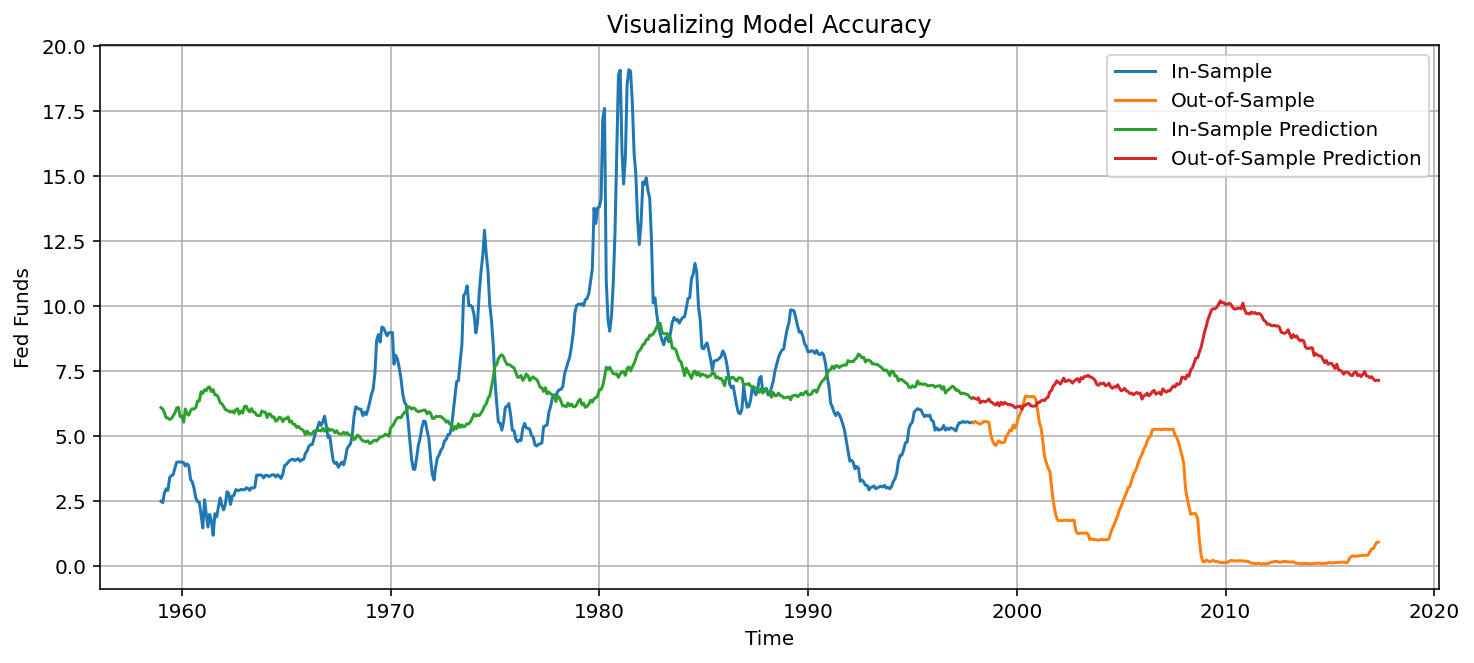

In [13]:
plt.figure(figsize = (12,5))

plt.plot(y_in) # In-Sample
plt.plot(y_out) # Out-of-Sample
plt.plot(model1.predict(X_in)) # In-Sample Prediction
plt.plot(model1.predict(X_out)) # Out-of-Sample Prediction
%config InlineBackend.figure_format = 'retina'

plt.ylabel("Fed Funds")
plt.xlabel("Time")
plt.title("Visualizing Model Accuracy")
plt.legend(["In-Sample", "Out-of-Sample", "In-Sample Prediction", "Out-of-Sample Prediction"])
plt.grid()
plt.show()

# Conclusion: The model underfits In-Sample while overfits Out-of-Sample Performance

## "All Models are wrong but some are useful" - 1976 George Box

# 5.) What are the in/out of sample MSEs

In [14]:
from sklearn.metrics import mean_squared_error
in_mse_1 =  mean_squared_error(model1.predict(X_in), y_in)
out_mse_1 = mean_squared_error(model1.predict(X_out), y_out)

In [15]:
print("In-Sample MSE : ", in_mse_1)
print("Out-of-Sample MSE : ", out_mse_1)

In-Sample MSE :  10.07142201316864
Out-of-Sample MSE :  40.36082783566657


# 6.) Using a for loop. Repeat 3,4,5 for polynomial degrees 1,2,3

In [16]:
from sklearn.preprocessing import PolynomialFeatures
#PolynomialFeatures?
#dir(poly)

In [17]:
max_degrees = 3

DEGREE :  1


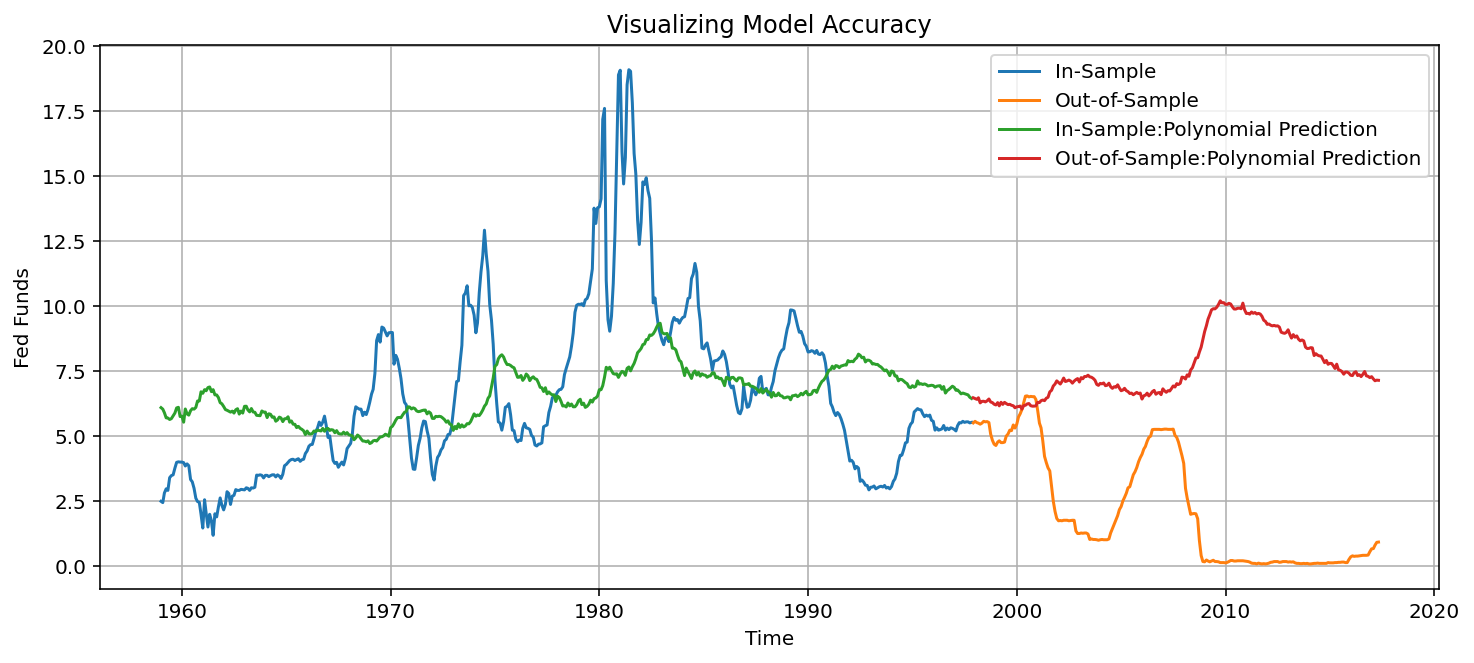

In-Sample MSE :  10.071422013168643
Out-of-Sample MSE :  40.36082783566697
DEGREE :  2


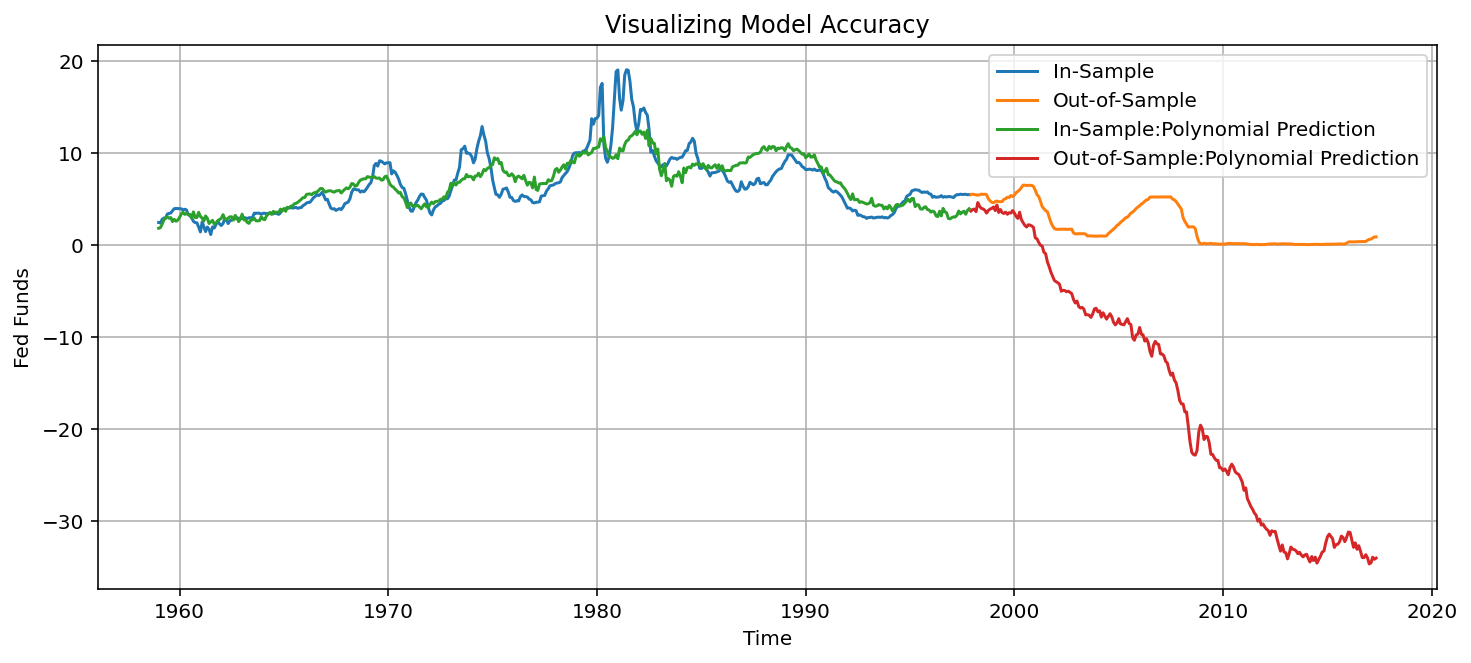

In-Sample MSE :  3.8634771392760676
Out-of-Sample MSE :  481.44650992068034
DEGREE :  3


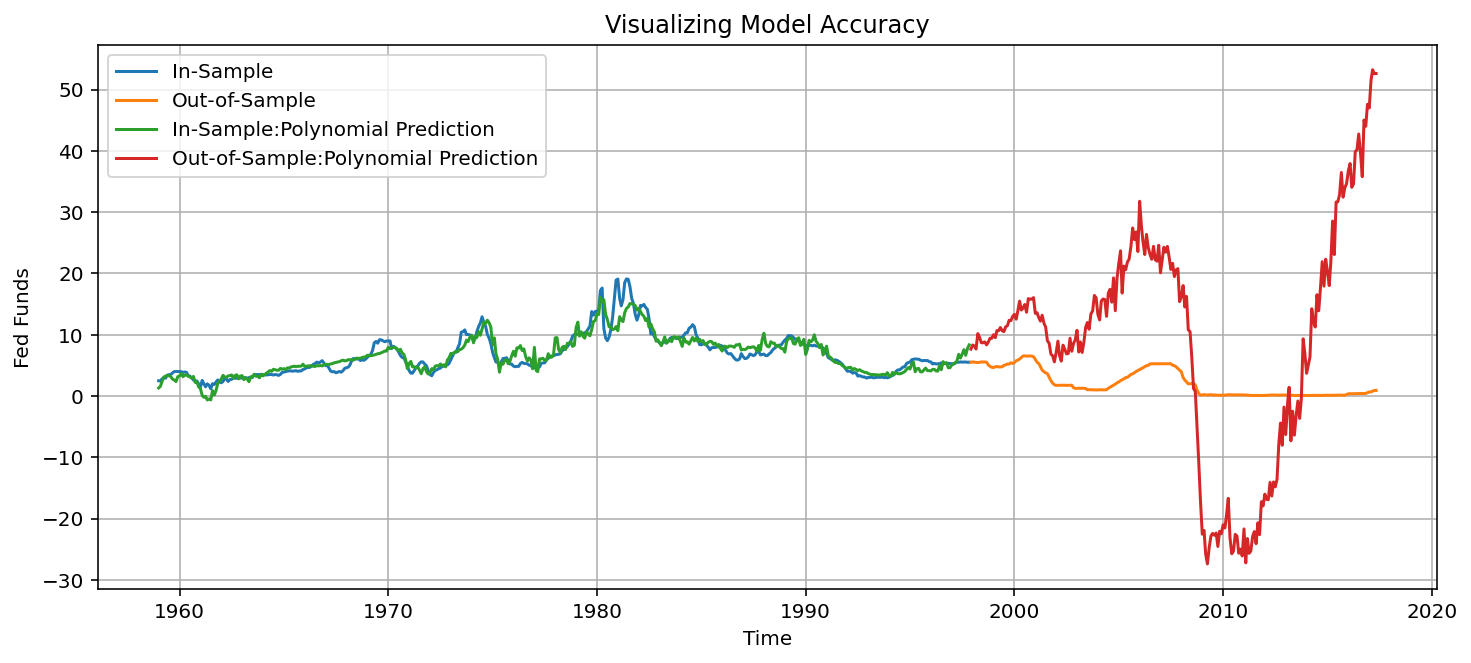

In-Sample MSE :  1.872363626670664
Out-of-Sample MSE :  371.7681026637797


In [50]:
for degrees in range(1, max_degrees + 1):
    print("DEGREE : ", degrees)
    poly = PolynomialFeatures(degree = degrees)
    X_in_poly = poly.fit_transform(X_in)
    X_out_poly = poly.transform(X_out)
   
    # Step 3).
    model_poly = sm.OLS(y_in, X_in_poly).fit()
    
    # Step 4).
    plt.figure(figsize = (12,5))
    
    pred_in = model_poly.predict(X_in_poly)
    pred_in = pd.DataFrame(pred_in, index = y_in.index)
    pred_out = model_poly.predict(X_out_poly)
    pred_out = pd.DataFrame(pred_out, index = y_out.index)
    
    plt.plot(y_in) # In-Sample
    plt.plot(y_out) # Out-of-Sample
    plt.plot(pred_in) # In-Sample Prediction
    plt.plot(pred_out) # Out-of-Sample Prediction
    %config InlineBackend.figure_format = 'retina'
    
    plt.ylabel("Fed Funds")
    plt.xlabel("Time")
    plt.title("Visualizing Model Accuracy")
    plt.legend(["In-Sample", "Out-of-Sample", "In-Sample:Polynomial Prediction", 
                "Out-of-Sample:Polynomial Prediction"])
    plt.grid()
    plt.show()
    
    # Step 5).
    in_mse_poly =  mean_squared_error(model_poly.predict(X_in_poly), y_in)
    out_mse_poly = mean_squared_error(model_poly.predict(X_out_poly), y_out)
    print("In-Sample MSE : ", in_mse_poly)
    print("Out-of-Sample MSE : ", out_mse_poly)

# 7.) State your observations :

As the model gets more complicated - adding up higher polynomial orders, the in-sample MSE has been wiped off with a much better in-sample performance or so called "underfitted the prediction". While, the elevation of model complexities skyrockets the Out-of-Sample MSE, overfitting the predictions as explicitly shown throughout the red line on the above figures.